<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/SMLAssn9_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB


In [83]:
# Check loading of the CSV file
try:
    col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hours_per_week',
             'native_country', 'income']
    df = pd.read_csv('adult.csv',names=col_names)
    print("Data loaded successfully!")
    print("Dataset shape:", df.shape)
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")



Data loaded successfully!
Dataset shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
# Strip whitespace from string columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [85]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)


In [86]:
le_dict = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoder for that column


In [87]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [89]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7908171722194597
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4503
           1       0.69      0.32      0.44      1530

    accuracy                           0.79      6033
   macro avg       0.75      0.64      0.65      6033
weighted avg       0.77      0.79      0.76      6033



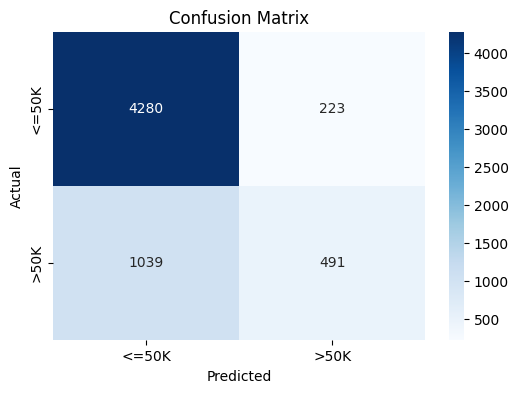

In [90]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()